# <center>CITS5508 Lab sheet 4:</center>

**Name: Ruan Scheepers**<br>
**Student number: 21980258**<br>
**Date created:** April 20th 2019<br>
**Last modified:** April 22nd 2019<br>



In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures for visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
## function to retrieve data set
def load_parkinsons_data():
    data_path = os.path.join("parkinsons.data")
    return pd.read_csv(data_path)

In [3]:
parkinsons_raw_data= load_parkinsons_data()

In [4]:
parkinsons_raw_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
parkinsons_raw_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
parkinsons_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
parkinsons_raw_data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

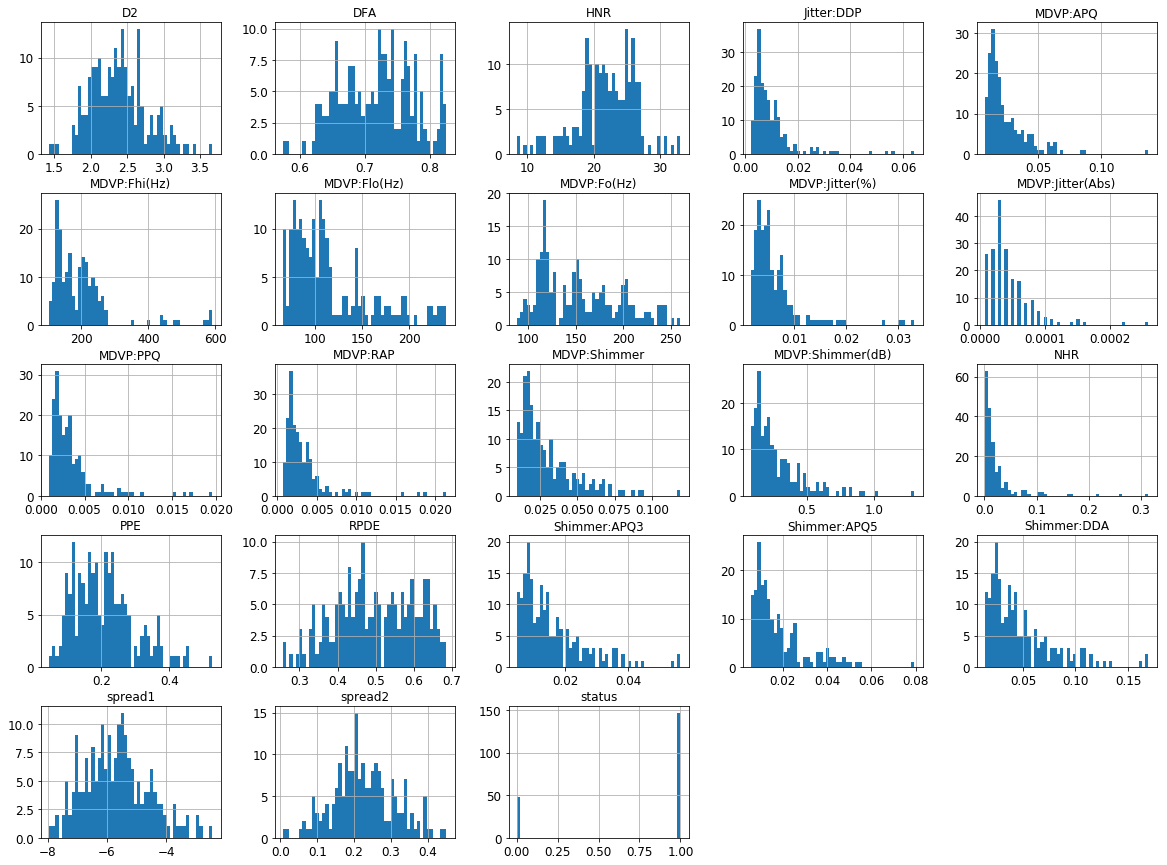

In [8]:
import matplotlib.pyplot as plt
parkinsons_raw_data.hist(bins=50, figsize=(20,15))
plt.show()

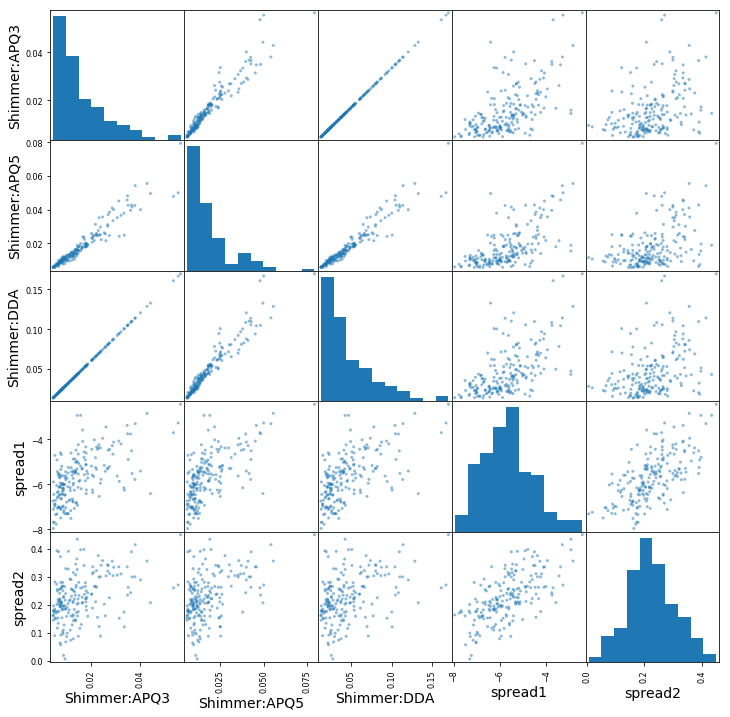

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:DDA", "spread1", "spread2"]
scatter_matrix(parkinsons_raw_data[attributes], figsize=(12, 12))
plt.show()

## Analysis

First we notice that the 'names' are all unique and can be removed, so we are left will all numerical data.

We got varied feature ranges from as small as 0.02 to 160 so we will have to do feature scaling.

There are many features that are well correlated, espeacially Shimmer APQ3 and Shimmer DDA which seems to be perfectly correlated.

There is a large bias in the amount of health vs unhealthy data sets, so when we split the data we will make sure to preserve the ratios.

For data cleaning we will remove the names only.

## Crop names, split data and extract the labels

In [10]:
parkinsons_data = parkinsons_raw_data.copy()
parkinsons_data = parkinsons_data.drop("name", axis = 1)

In [11]:
parkinsons_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(parkinsons_data, parkinsons_data["status"]):    
    strat_train_set = parkinsons_data.loc[train_index]    
    strat_test_set = parkinsons_data.loc[test_index] 

In [13]:
print("Ratios of the test set")
print(strat_test_set["status"].value_counts() / len(strat_test_set))
print("\n")
print("Ratios of the training set")
print(strat_train_set["status"].value_counts() / len(strat_train_set))
print("\n")

Ratios of the test set
1    0.74359
0    0.25641
Name: status, dtype: float64


Ratios of the training set
1    0.75641
0    0.24359
Name: status, dtype: float64




In [14]:
train_labels = strat_train_set["status"]
test_labels = strat_test_set["status"]
train_features = strat_train_set.drop("status",axis=1)
test_features = strat_test_set.drop("status",axis=1)

## Performance Measure

Now that we have a separated the data into a training and testing data we will train the classifiers using the training data and do an initial performance measure using cross validation against the training data. Here is where we can fine-tune the hyperparameters of the models both manually or using for example a grid search.

Then the testing data will be used for a final performance evaluation on the models to compare which performed best.

The performance will be measure in the following: 

Accuracy: How often the predicted label matches the true label, this does not measure false positives so having a trivial model that guesses the most common class will do well (especially in this case since the data is skewed)

F1_score: This is a better measure of accuracy as it incorporates false positives and false negatives. It's a 'weighted average' between precision and recall. Note it does reward models that have similar precision and recall (sometimes the context demands cases where we prefer precision or recall and willing to make a tradeoff).

Confusion Matrices: Finally we will be analysing the confusion matrices, this shows the true labels and misslables of the model, it can highlight a particular class being prone to misslabeling ect. This can lead to some fine-tuning or reworking of the model to better understand those classes.


In [15]:
## Imports required and the matrix plotting function.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


def plot_confusion_matrix(matrix, labels):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xticklabels([""] + labels)
    ax.set_yticklabels([""] + labels)
    cax = ax.matshow(matrix, cmap=plt.cm.gray)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    thresh = matrix.max() / 2.
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, format(matrix[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if matrix[i, j] < thresh else "black")
    fig.tight_layout()

## Training the SVM classifier 

In [16]:
#instansiate the scaler.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('SVM', SVC(kernel="rbf")),
    ])

## Hyper Paramaters

Two regularisation paramaters

-C 'Hard-margin' vs Soft 'Margin'   (Lower 'c' more regularised)

-Gamma A higher gamma results in the decision boundary to be more irregular, again a lower gamma will tend towards a linear decision boundary and acts as a regularisation paramater.

I will run a small Grid search on some different regularisations. (just on increments of order 10, and usisng 0.04 for gamma as its roughtly 1/(number of features) which is the defualt value)

We will also allow for probabilities, since we ultimately want to use the model in a voting classifier and want to keep 'soft' voting open as an option

In [17]:
regularisation_parameters = {'SVM__C':[0.001,0.1,10,100,1000,10e4], 'SVM__gamma':[0.1,0.01,0.04]}

In [18]:
grid = GridSearchCV(pipeline, param_grid=regularisation_parameters, cv=4, iid = True)

In [19]:
grid.fit(train_features, train_labels)
print (grid.best_params_)

{'SVM__C': 10, 'SVM__gamma': 0.1}


In [20]:
## Set up the classifier using the hyperparamaters found above.
svm_classifier = Pipeline([
        ('std_scaler', StandardScaler()),
        ('SVM', SVC(kernel="rbf", C = 10, gamma = 0.1,probability=True)),
    ])
svm_classifier.fit(train_features, train_labels)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [21]:
predicted_cross_train = cross_val_predict(svm_classifier, train_features, train_labels, cv = 3)

In [22]:
matrix_train = confusion_matrix(train_labels, predicted_cross_train)

In [23]:
print("Accuracy :")
print(cross_val_score(svm_classifier, train_features, train_labels, cv = 3, scoring = "accuracy"))
print("F1 Score :", f1_score(train_labels, predicted_cross_train, average='macro'))

Accuracy :
[0.9245283  0.90384615 0.92156863]
F1 Score : 0.8859071729957806


Confusion matrix on the training set


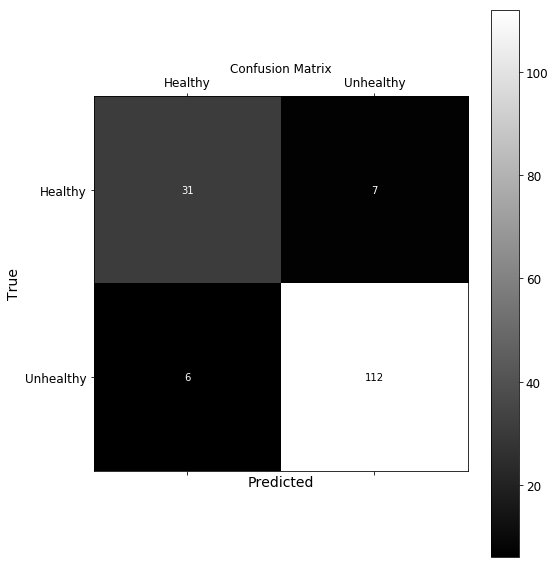

In [24]:
print("Confusion matrix on the training set")
plot_confusion_matrix(matrix_train, ["Healthy","Unhealthy"])

## Testing Set Results.

In [25]:
predicted_svm_test = svm_classifier.predict(test_features)

Accuracy : 0.9487179487179487
f1 score macro : 0.9327586206896552


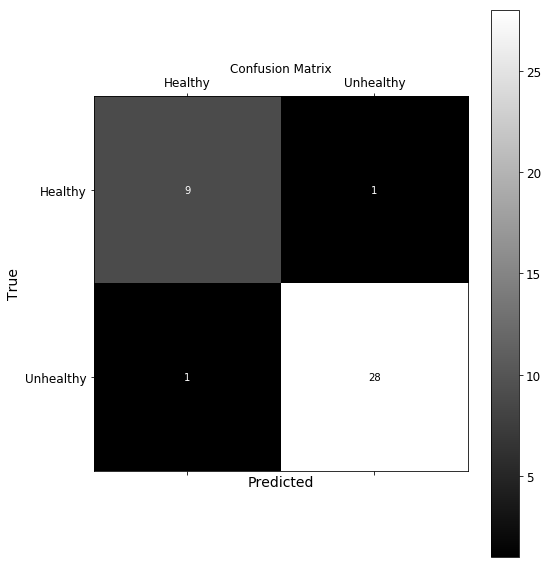

In [26]:
matrix_test = confusion_matrix(test_labels, predicted_svm_test)

print("Accuracy :", accuracy_score(test_labels, predicted_svm_test))
print("f1 score macro :",f1_score(test_labels, predicted_svm_test, average='macro'))
plot_confusion_matrix(matrix_test, ["Healthy","Unhealthy"])

## ANALYSIS

This classifier performed very well on both sets with f1 scores of 0.88 and 0.93

## LOGISTIC REGRESSION

## Hyper Paramaters

We will use the 'C' Hyperparamater for regularisation. (Lower 'c' more regularised)

The regression will also be using a 'lbfgs' solver with a 'l2' penalty for more regularisation. 

I will run a small Grid search on some different 'C' Values. (just on increments of order 10)

In [27]:
#instansiate the scaler.
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('Logistic', LogisticRegression(solver='lbfgs', max_iter = 1000)),
    ])

In [28]:
logistic_paramaters = {'Logistic__C':[0.001,0.1,5,10,15,100,1000,10e4]}
grid = GridSearchCV(pipeline, param_grid=logistic_paramaters, cv=3, iid=True)

In [29]:
grid.fit(train_features, train_labels)
print (grid.best_params_)

{'Logistic__C': 10}


In [30]:
#Using the hyper_paramters found above

log_classifier = Pipeline([
        ('std_scaler', StandardScaler()),
        ('log', LogisticRegression(solver='lbfgs', max_iter = 1000, C = 10)),
    ])
log_classifier.fit(train_features, train_labels)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [31]:
predicted_cross_train = cross_val_predict(log_classifier, train_features, train_labels, cv = 3)
matrix_train = confusion_matrix(train_labels, predicted_cross_train)

In [32]:
print("Accuracy :")
print(cross_val_score(svm_classifier, train_features, train_labels, cv = 3, scoring = "accuracy"))
print("F1 Score :", f1_score(train_labels, predicted_cross_train, average='macro'))

Accuracy :
[0.9245283  0.90384615 0.92156863]
F1 Score : 0.8158205430932703


Confusion matrix


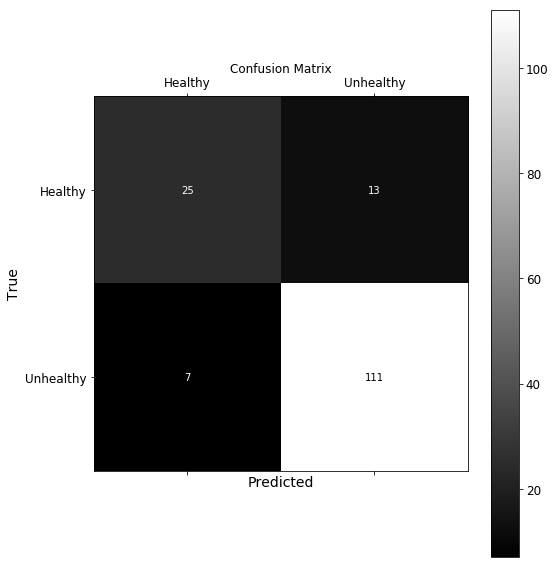

In [33]:
print("Confusion matrix")
plot_confusion_matrix(matrix_train, ["Healthy","Unhealthy"])

## Testing Set Results.

In [34]:
predicted_log_test = log_classifier.predict(test_features)

Accuracy : 0.8974358974358975
f1 score macro : 0.8655172413793104


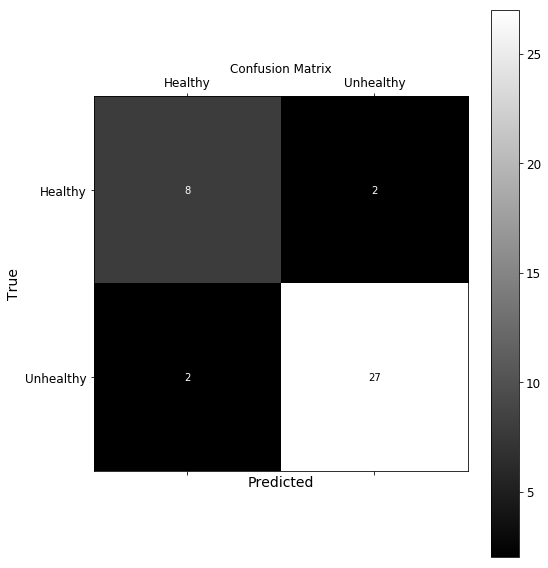

In [35]:
matrix_test_log = confusion_matrix(test_labels, predicted_log_test)

print("Accuracy :", accuracy_score(test_labels, predicted_log_test))
print("f1 score macro :",f1_score(test_labels, predicted_log_test, average='macro'))
plot_confusion_matrix(matrix_test_log, ["Healthy","Unhealthy"])

## Analysis

This model did not perform as well as the svm, scoring lower on the training and testing set. It still performed well with f1_scores over 0.8 in both cases

# Ensemble classifier

We will now use both the classifiers above combined in a ensemble classifier, since the svm scored very well and both models had some tuning done to the hyperparameters we will be using 'soft' voting. This will become more important if we dicide to add more models to the ensemble.

In [36]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', log_classifier), ('svm', svm_classifier)],
    voting='soft',
    ) 
voting_clf.fit(train_features, train_labels)

VotingClassifier(estimators=[('lr', Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, ...  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

Accuracy :
[0.88679245 0.88461538 0.94117647]
F1 Score : 0.8683702989392478
Confusion matrix


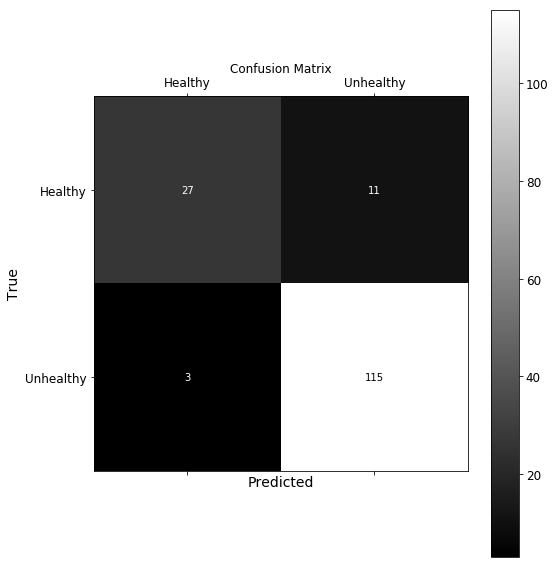

In [37]:
predicted_cross_train_ensemble = cross_val_predict(voting_clf, train_features, train_labels, cv = 3)
matrix_train_ensemble = confusion_matrix(train_labels, predicted_cross_train_ensemble)
print("Accuracy :")
print(cross_val_score(voting_clf, train_features, train_labels, cv = 3, scoring = "accuracy"))
print("F1 Score :", f1_score(train_labels, predicted_cross_train_ensemble, average='macro'))
print("Confusion matrix")
plot_confusion_matrix(matrix_train_ensemble, ["Healthy","Unhealthy"])

Accuracy : 0.9487179487179487
f1 score macro : 0.9327586206896552


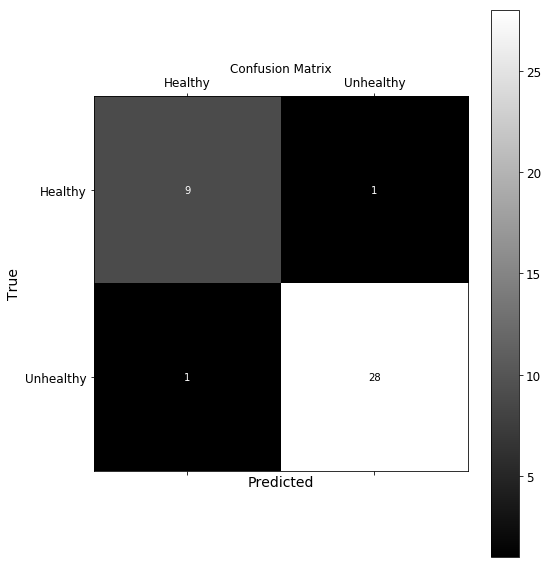

In [38]:
predicted_ens_test = voting_clf.predict(test_features)
matrix_test_ens = confusion_matrix(test_labels, predicted_ens_test)

print("Accuracy :", accuracy_score(test_labels, predicted_ens_test))
print("f1 score macro :",f1_score(test_labels, predicted_ens_test, average='macro'))
plot_confusion_matrix(matrix_test_ens, ["Healthy","Unhealthy"])

## Analysis.

The Ensemble classifier outperformed the logistic regressor in both instances. 

The svm slightly outperformed the ensemble model on the training set. It also performed the same as the testing set. 

The svm might have slightly outperformed on the training data as the logistic regressor could've been very confident on a wrong decision. 

To further improve the voting model's performance, we could train more classifiers to join the voting system. This will help vote against any incorrect classifications from the logistic model. 

The data set was also small, having only 10 healthy entries to test on, a larger data set will allow for a better trained model as well as a more accurate measure of the performance. (A chance for the ensemble to differentiate itself from the svm model) The data was enough to determine that the ensemble classifier was an improvement on the logistic model.


***
***
***
## Project 2  Regression model to predict the number of rings on 'Abalone' shellfish
***
***
***

In [39]:
# Common imports 
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures for visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [40]:
## functions to retrieve data set
def load_abalone_data():
    data_path = os.path.join("abalone.data")
    return pd.read_csv(data_path,header=None)

In [41]:
abalone_raw_data= load_abalone_data()

In [42]:
abalone_raw_data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
abalone_raw_data.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


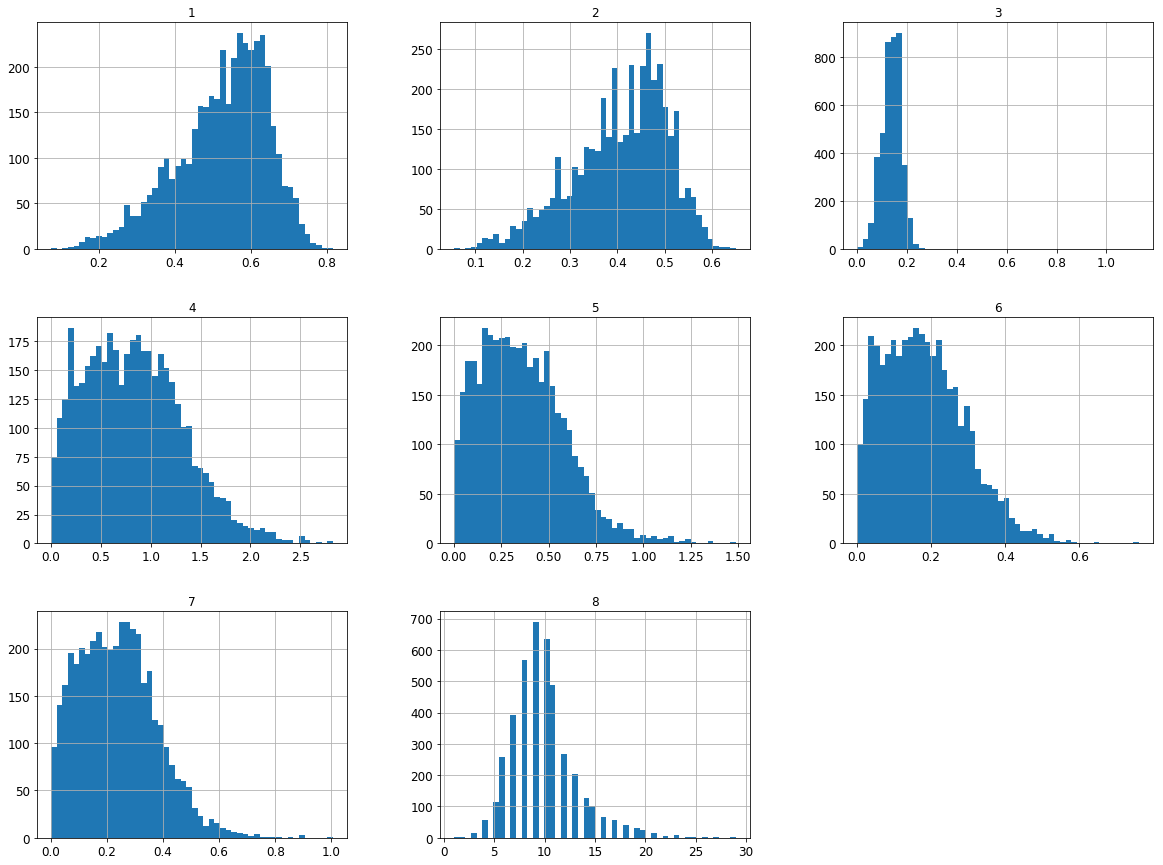

In [44]:
import matplotlib.pyplot as plt
abalone_raw_data.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
abalone_raw_data[0].value_counts()

M    1528
I    1342
F    1307
Name: 0, dtype: int64

In [46]:
rings = abalone_raw_data[8].value_counts()

In [47]:
rings.sort_index(inplace=True);
print(rings)

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: 8, dtype: int64


Ring sizes of 1-3 and 22-29 has a very small count, the following will be a small analysis to see if the features are very similar for these groups, if so we can combine them otherwise we will disgard them entirely. 

In [48]:
rings1_4 = abalone_raw_data.loc[(abalone_raw_data[8] >= 1) & (abalone_raw_data[8] <= 4)]

In [49]:
rings21_29 = abalone_raw_data.loc[(abalone_raw_data[8] >= 21) & (abalone_raw_data[8] <= 29)]

In [50]:
rings1_4.describe()

,1,2,3,4,5,6,7,8
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.209324,0.152635,0.050473,0.051899,0.021500,0.011311,0.015764,3.729730
std,0.052690,0.040028,0.017618,0.037337,0.016268,0.008295,0.011826,0.556341
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.170000,0.125000,0.040000,0.025000,0.009500,0.005500,0.007250,4.000000
50%,0.205000,0.150000,0.050000,0.040500,0.017000,0.008500,0.012750,4.000000
75%,0.245000,0.180000,0.060000,0.069875,0.029875,0.014000,0.020000,4.000000
max,0.360000,0.270000,0.095000,0.196000,0.087500,0.035000,0.064000,4.000000


In [51]:
rings21_29.describe()

,1,2,3,4,5,6,7,8
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.612778,0.484861,0.180139,1.295389,0.446778,0.251403,0.442639,22.638889
std,0.077482,0.066456,0.028598,0.464262,0.178357,0.100178,0.162711,2.002181
min,0.450000,0.365000,0.125000,0.573000,0.158000,0.110000,0.170000,21.000000
25%,0.550000,0.420000,0.160000,0.924375,0.330500,0.175500,0.292500,21.000000
50%,0.625000,0.490000,0.180000,1.245250,0.425750,0.255750,0.440000,22.000000
75%,0.666250,0.536250,0.200000,1.602625,0.536000,0.307250,0.558750,23.000000
max,0.800000,0.630000,0.225000,2.526000,0.933000,0.590000,0.885000,29.000000


Look at where the 1-4 range sits, if we observe that they are close to each other we can consider merging, NOTE: y-axis was limited to only 50 to 'zoom' in on the orange


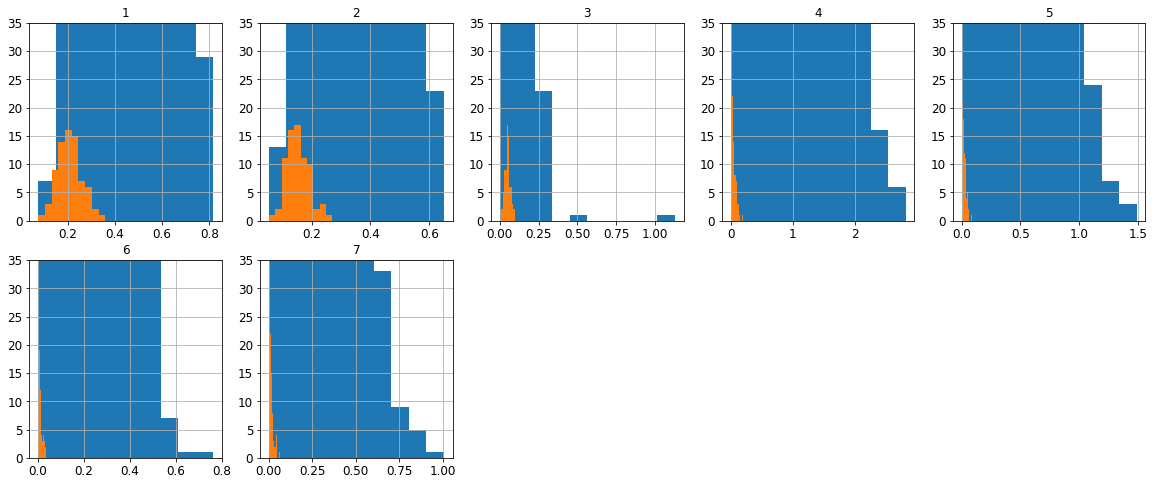

In [52]:
print ("Look at where the 1-4 range sits, if we observe that they are close to each other we can consider merging, NOTE: y-axis was limited to only 50 to 'zoom' in on the orange")  
fig=plt.figure(figsize=(20, 8),facecolor='w', edgecolor='k')
for i in range(1,8):
    plt.ylim(0, 35)
    temp = 251+i-1  # this is to index the position of the subplot
    ax=plt.subplot(temp)
    abalone_raw_data[i].hist()
    rings1_4[i].hist()
    #just annotating where each contour plot is being placed
    ax.set_title(i)
plt.ylim(0, 35)
plt.show()

Look at where the 1-4 range sits, if we observe that they are close to each other we can consider merging, NOTE: y-axis was limited to only 50 to 'zoom' in on the orange


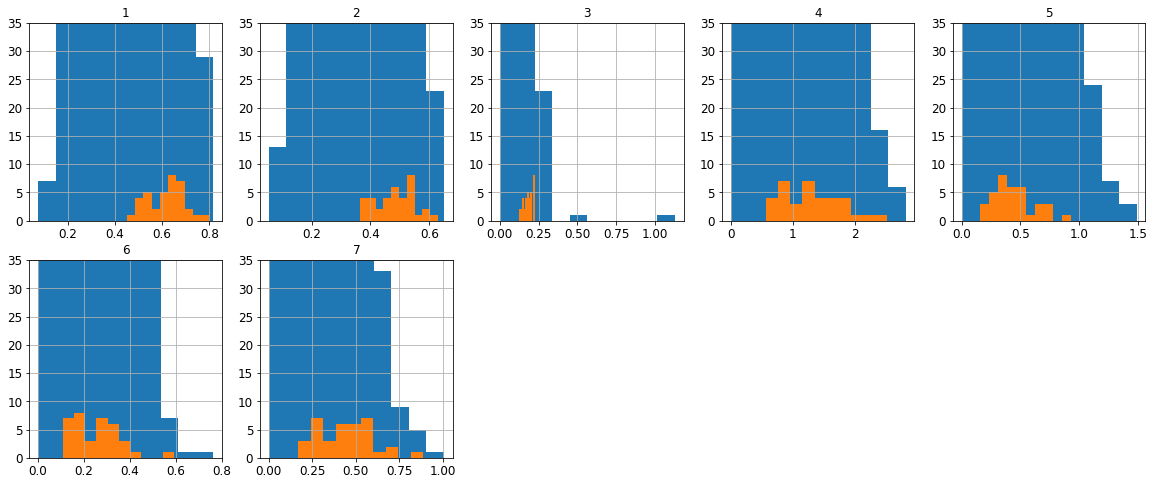

In [53]:
print ("Look at where the 1-4 range sits, if we observe that they are close to each other we can consider merging, NOTE: y-axis was limited to only 50 to 'zoom' in on the orange")  
fig=plt.figure(figsize=(20, 8),facecolor='w', edgecolor='k')
for i in range(1,8):
    plt.ylim(0, 35)
    temp = 251+i-1  # this is to index the position of the subplot
    ax=plt.subplot(temp)
    abalone_raw_data[i].hist()
    rings21_29[i].hist()
    #just annotating where each contour plot is being placed
    ax.set_title(i)
plt.ylim(0, 35)
plt.show()

## Analysis 

The 1-4 range has a small standard deviation for all features, they are also 'packed' to the lower end for each feature (the min and average is very close to the whole populations min.), especially for features 4-7. This is highly in favour of committing to the grouping. I will group the rings 1-4 as a <5 group. The features 1-3 isn't as tightly packed as 4-7, but the standard deviation is sufficiently small and the range does sit at the left well enough. We will just keep this in mind, especially if many of the features from 4-7 gets removed in the dimension reduction. If we have a poor perming model this decision can be revisited. 

For the rings 21-29 we can see the standard deviation is a lot larger, the range also spreads across a relatively large percentage of the actual population's range, this is concerning as it only counts for roughly 36/4000 of the data. They are also not skewed to an extreme and are multimodal in many cases. For those reasons we will not be grouping these data and dropping rings of sizes 22-29. This isn't a significant loss since we are only losing 23 entries.

There exists a non-numerical dataset, so we will have to clean that up. Since we will be using trees we will not have to worry about any scaling.

The number of instances on each 'ring' count is also extremely varied so when splitting the data we will maintain these ratios.


## Removing and grouping ring sizes

In [54]:
abalone_data = abalone_raw_data.copy()

In [55]:
abalone_data = abalone_data[abalone_data[8] < 22]

In [56]:
## IF YOU WANT TO REMOVE THE 4 VALUES UNCOMMENT BELOW
## abalone_data = abalone_data[abalone_data[8] >= 4]

In [57]:
abalone_data.loc[(abalone_data[8] >= 1) & (abalone_data[8] < 4), 8] = 4

In [58]:
rings = abalone_data[8].value_counts()
rings.sort_index(inplace=True);
print("Confirm that it worked, we are looking for 74 values of ring size 4, and no instances greater than 21 rings")
print(rings)

Confirm that it worked, we are looking for 74 values of ring size 4, and no instances greater than 21 rings
4      74
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
Name: 8, dtype: int64


In [59]:
## Since we removed some rows we will reset the indexing.
abalone_data = abalone_data.reset_index(drop=True)

## Non-numerical Data

Since we will be training a Random Forest model we do not need to scale the features. The final step in preparing the data is to handle the non-numerical data.

We have two options to consider for the non-numerical data. <br>
1. Have three dummy features each binary for m,f,i example (1,0,0) for m, (0,1,0) for f and (0,0,1) for i.
2. Have a numerical label for each class example m = 0, f = 1, i = 2.

The proplem with option 2 is that it implies some 'order' between the classes but the these options are purely categorical. Since we are going to train a random forest and trees are invariant under scaling this problem does not apply here. The trees can branch 3 times on this 'feature' and these 3 branches will not 'care' about the ordinal nature of our class labels. <br>

To handle the non-numerical data we can simply replace each m,f,i with a numerical label.


In [60]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
abalone_data_categorical = abalone_data[[0]]
print(abalone_data_categorical.head(10))
abalone_data_ordinal_array = ordinal_encoder.fit_transform(abalone_data_categorical)
abalone_data_ordinal_array[:10]

abalone_data_ordinal = pd.DataFrame({'0':abalone_data_ordinal_array[:,0]})
print(abalone_data_ordinal.head(10))

   0
0  M
1  M
2  F
3  M
4  I
5  I
6  F
7  F
8  M
9  F
     0
0  2.0
1  2.0
2  0.0
3  2.0
4  1.0
5  1.0
6  0.0
7  0.0
8  2.0
9  0.0


In [61]:
ordinal_encoder.categories_

[array(['F', 'I', 'M'], dtype=object)]

In [62]:
abalone_data_prepared = abalone_data.copy()
print(abalone_data_prepared.head())
abalone_data_prepared = abalone_data_prepared.drop(0, axis = 1)
print(abalone_data_prepared.head())
abalone_data_prepared = pd.concat([abalone_data_ordinal, abalone_data_prepared], axis=1)
abalone_data_prepared.head() 

   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
       1      2      3       4       5       6      7   8
0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


,0,1,2,3,4,5,6,7,8
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Splitting the data 90/10

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(abalone_data_prepared, abalone_data_prepared[8]):    
    train_set = abalone_data_prepared.loc[train_index]    
    test_set = abalone_data_prepared.loc[test_index]

In [64]:
print("Ratios of the test set")
print(test_set[8].value_counts().sort_index() / len(test_set))
print("\n")
print("Ratios of the training set")
print(train_set[8].value_counts().sort_index() / len(train_set))
print("\n")

Ratios of the test set
4     0.016827
5     0.028846
6     0.062500
7     0.093750
8     0.137019
9     0.165865
10    0.151442
11    0.117788
12    0.064904
13    0.048077
14    0.031250
15    0.024038
16    0.016827
17    0.014423
18    0.009615
19    0.007212
20    0.007212
21    0.002404
Name: 8, dtype: float64


Ratios of the training set
4     0.017919
5     0.027547
6     0.062316
7     0.094143
8     0.136668
9     0.165820
10    0.152715
11    0.117144
12    0.064188
13    0.048944
14    0.030222
15    0.024873
16    0.016047
17    0.013907
18    0.010163
19    0.007756
20    0.006151
21    0.003477
Name: 8, dtype: float64




In [65]:
train_rings = train_set[8]
test_rings = test_set[8]
train_features = train_set.drop(8,axis=1)
test_features = test_set.drop(8,axis=1)

## Training the Random Forest Regressor

We will be using the n_estimators at a 100 for all instances and set no max depth, this means that the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. A leaf is pure when all of its data belongs to a single class. We will leave the min_samples_split at 2.

The success of each model will be measured using RMSE (root mean squared errors). The Absolute error will also be displayed in a bar graph for each test instance

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [67]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_features, train_rings)

ring_predictions = forest_reg.predict(test_features)
forest_mse = mean_squared_error(test_rings, ring_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.119684415008699

<function matplotlib.pyplot.show(*args, **kw)>

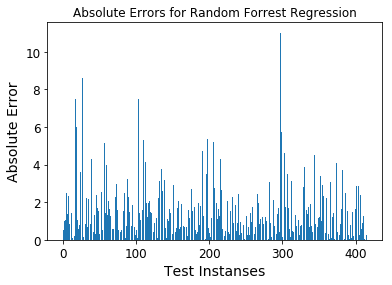

In [68]:
plt.bar(np.arange(len(test_rings)), abs(test_rings - ring_predictions))
plt.title('Absolute Errors for Random Forrest Regression')
plt.xlabel('Test Instanses')
plt.ylabel('Absolute Error')
plt.show

In [69]:
feature_importance = pd.Series(forest_reg.feature_importances_,
                               index = ["feature 0","feature 1","feature 2","feature 3","feature 4","feature 5","feature 6","feature 7"])

print("The following is the feature importance for each feature, this gives us an indication if we could/should remove any")
print(feature_importance)

The following is the feature importance for each feature, this gives us an indication if we could/should remove any
feature 0    0.023172
feature 1    0.049282
feature 2    0.054017
feature 3    0.053781
feature 4    0.082332
feature 5    0.158289
feature 6    0.074532
feature 7    0.504594
dtype: float64


In [70]:
print("Sorting the importance we can view the most important to least importance feature")
feature_importance.sort_values(ascending = False, inplace=True)
feature_importance

Sorting the importance we can view the most important to least importance feature


feature 7    0.504594
feature 5    0.158289
feature 4    0.082332
feature 6    0.074532
feature 2    0.054017
feature 3    0.053781
feature 1    0.049282
feature 0    0.023172
dtype: float64

In [71]:
print("The following is the cumulative sum of the features in the order directly above, As seen we reach the '0.95' threshold just before the last feature. We can remove this last feature and still have 95% feature importance. ")
print("\n")
cumsum = 0
for i in range(len(feature_importance)):
    cumsum += feature_importance.values[i]
    print (cumsum)

The following is the cumulative sum of the features in the order directly above, As seen we reach the '0.95' threshold just before the last feature. We can remove this last feature and still have 95% feature importance. 


0.5045942852648972
0.662882987151412
0.7452146885481733
0.8197468814749767
0.8737640064704997
0.927545453649047
0.9768276951531637
1.0


The feature importance above indicate that we can remove feature 0 and still have a 0.97% feature importance, we can even consider removing feature 0 and 1 if it was important to reduce the work required by the model. We will then still maintain a 93% importance. Since this assignment is looking and feature reduction I will will remove both features and assess the performance. 

In [72]:
train_features_reduced = train_features.copy()
test_features_reduced = test_features.copy()
train_features_reduced = train_features_reduced.drop(['0',1],axis=1)
test_features_reduced = test_features_reduced.drop(['0',1],axis=1)

In [73]:
#train the new model on the reduced set (using the same hyperparamaters)
forest_reg_red = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_red.fit(train_features_reduced, train_rings)

ring_predictions_red = forest_reg_red.predict(test_features_reduced)
forest_mse_red = mean_squared_error(test_rings, ring_predictions_red)
forest_rmse_red = np.sqrt(forest_mse_red)
forest_rmse_red

2.15397670019896

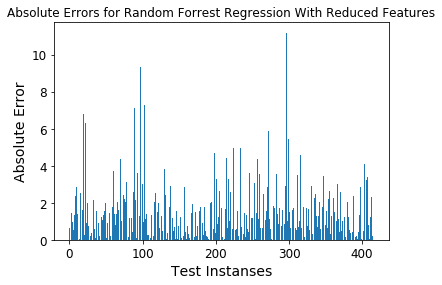

In [74]:
plt.bar(np.arange(len(test_rings)), abs(test_rings - ring_predictions_red))
plt.title('Absolute Errors for Random Forrest Regression With Reduced Features')
plt.xlabel('Test Instanses')
plt.ylabel('Absolute Error')
plt.show()

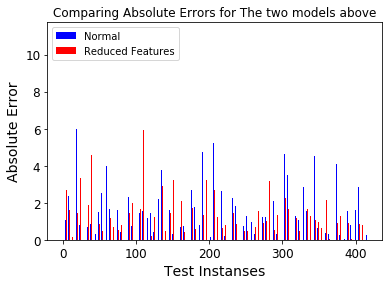

In [75]:
ax = plt.subplot(111)

N = len(test_rings)
ind = np.arange(N)  # the x locations for the groups
w = 0.4       # the width of the bars


normal = ax.bar(ind, abs(test_rings - ring_predictions), width=0.2 ,color='b')
reduced = ax.bar((ind+w), abs(test_rings - ring_predictions_red), width=0.2 ,color='r')
ax.legend((normal[0], reduced[0]), ('Normal', 'Reduced Features' ))

plt.title('Comparing Absolute Errors for The two models above')
plt.xlabel('Test Instanses')
plt.ylabel('Absolute Error')

plt.show()

## Analysis

We were able to reduce the dimensionality by 2 and the rmse only increased by 0.03. 

## Run Dimensionality Reduction using PCA and compare it to the models above.

First we will see how many componenets will be required to maintain 99% of the variance and then do the pca fit on those amount of components.

In [76]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
print("Number of components needed:", d)

Number of components needed: 2


In [77]:
#Run on components found above
pca = PCA(n_components = d) 

In [78]:
pca_reduced_train_features = pca.fit_transform(train_features) #fit transform the training
pca_reduced_test_features = pca.transform(test_features) # transform the testing

In [79]:
pca_reduced_train_features[:10]

array([[-0.93581102,  0.28196325],
       [ 0.05038126, -0.24798663],
       [-0.92287519,  0.76537528],
       [ 1.05835825,  0.04368632],
       [ 1.05953063,  0.06034726],
       [ 0.04244969, -0.53820282],
       [-0.9613813 , -0.66401829],
       [-0.93044397,  0.46675039],
       [ 0.03931218, -0.65188559],
       [-0.92588649,  0.65335567]])

In [80]:
forest_reg_pca = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_pca.fit(pca_reduced_train_features, train_rings)

ring_predictions_pca = forest_reg_pca.predict(pca_reduced_test_features)
forest_mse_pca= mean_squared_error(test_rings, ring_predictions_pca)
forest_rmse_pca = np.sqrt(forest_mse_pca)
forest_rmse_pca

2.4961152028240265

## Analysis. 

The PCA was able to reduce the dimenstionality significantly, from 8 to 2. After the reduction it still maintained 99% of the variance but scored roughtly 17% worse (increasing from 0.212 to 2.496).